In [ ]:
"""
1. There is a quadratic relationship between city latitude and maximum temperature. This makes sense as temperature of cities
around equator is higher than other cities. An interesting observation is maximum temperature of cities in north hemisphere 
(Latitude 25) seem to be higher than cities in south hemisphere (Latitude -25)
2. The distribution of humidity in cities around Latitude 0 is more dense (smaller range). For cities with larger Latitude 
the distribution of humidity becomes more spread out (larger range)
3. From the plots, there is no significant relationship betwen latitude and cloudiness, and there is no significant relationship
between latitude and wind speed. However, for cities along Latitude -50 to Latitude 50, the values of cloudiness are nearly 
uniformlly distributed, while values of wind speed are more clusterd in the range between 0 and 10.
"""

In [139]:
# import libraries for the anlaysis
import json
import requests
import openweathermapy as ow
from citipy import citipy
from random import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import seaborn as sns
import time

In [29]:
# import API key
from config import api_key

In [145]:
# Set output file (CSV) directory
output_data_file = "output_data\cities.csv"

In [32]:
# Randomly select lat and lon for 1500 locations
# Use random.uniform to ensure all avlues in the rages have sane probability to be selected
lat=np.random.uniform(-90,90,1500)
lon=np.random.uniform(-180,180,1500)

In [33]:
# Create a list of unique cities based on the lat and Lon
city_list=[]

# Use citipy to determine city based on latitude and longitude
for lat, lon in zip(lat, lon):
    city = (citipy.nearest_city(lat, lon)).city_name
    
    # Only add the unique city to city_list
    if city not in city_list:
        city_list.append(city)    

# Print the city count to confirm sufficient count
print(len(city_list))

# Now we can see 613 unique cities are returned

613


In [34]:
# Generate URL for the API request
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

In [35]:
# Create a series of lists for holding data
country = []
date = []
cloud = []
humidity = []
lattitude = []
longtitude = []
max_temp = []
wind_speed = []
cities = []

# Use i to count the record number, and s to count the set number, here 1 set contains 100 records
i = 0
s = 1
print("Beginning Data Retrival \n-------------------------------")

# Use for loop to make request and store response
for city in city_list:
    # Let program wait 0.5 seconds after each set (100 requests)
    if (i%100 == 0) and i!=0:
        time.sleep(0.5)
        s = s+1
        print("Have a rest for 0.5s")
        
    # Use try/except in case certain city can not be found in OpenWeatherMap API    
    try:
        city = city.replace (" ", "%20")
        url = base_url + "units=" + units + "&APPID=" + api_key + "&q=" + city
        response = requests.get(url).json()
        cities.append(response['name'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        cloud.append(response['clouds']['all'])
        humidity.append(response['main']['humidity'])
        lattitude.append(response['coord']['lat'])
        longtitude.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        i=i+1
        print("Processing Record %d of Set %d | %s" %(i-(s-1)*100, s, response['name']))
        print(url)
        
    except:
        i = i+1
        print("Processing Record %d of Set %d | %s" %(i-(s-1)*100, s, city.replace("%20", " ")))
        print("Fail: no city is found in OpenWeatherMap")
        
        continue

Beginning Data Retrival 
-------------------------------
Processing Record 1 of Set 1 | Albany
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=b7d80f7735871f892dd577ce001bbfb2&q=albany
Processing Record 2 of Set 1 | Busselton
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=b7d80f7735871f892dd577ce001bbfb2&q=busselton
Processing Record 3 of Set 1 | Saskylakh
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=b7d80f7735871f892dd577ce001bbfb2&q=saskylakh
Processing Record 4 of Set 1 | Conceicao do Araguaia
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=b7d80f7735871f892dd577ce001bbfb2&q=conceicao%20do%20araguaia
Processing Record 5 of Set 1 | Aklavik
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=b7d80f7735871f892dd577ce001bbfb2&q=aklavik
Processing Record 6 of Set 1 | Vila Velha
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=b7d80f7735871f892dd577ce001bbfb2&q=vila%20vel

Processing Record 55 of Set 1 | Pinawa
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=b7d80f7735871f892dd577ce001bbfb2&q=pinawa
Processing Record 56 of Set 1 | Pacific Grove
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=b7d80f7735871f892dd577ce001bbfb2&q=pacific%20grove
Processing Record 57 of Set 1 | Capao da Canoa
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=b7d80f7735871f892dd577ce001bbfb2&q=capao%20da%20canoa
Processing Record 58 of Set 1 | Georgetown
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=b7d80f7735871f892dd577ce001bbfb2&q=georgetown
Processing Record 59 of Set 1 | New Norfolk
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=b7d80f7735871f892dd577ce001bbfb2&q=new%20norfolk
Processing Record 60 of Set 1 | Bethel
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=b7d80f7735871f892dd577ce001bbfb2&q=bethel
Processing Record 61 of Set 1 | Hermanus
http://ap

Processing Record 11 of Set 2 | Havre-Saint-Pierre
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=b7d80f7735871f892dd577ce001bbfb2&q=havre-saint-pierre
Processing Record 12 of Set 2 | Srednekolymsk
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=b7d80f7735871f892dd577ce001bbfb2&q=srednekolymsk
Processing Record 13 of Set 2 | kazalinsk
Fail: no city is found in OpenWeatherMap
Processing Record 14 of Set 2 | scottsburgh
Fail: no city is found in OpenWeatherMap
Processing Record 15 of Set 2 | Koshurnikovo
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=b7d80f7735871f892dd577ce001bbfb2&q=koshurnikovo
Processing Record 16 of Set 2 | Port Elizabeth
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=b7d80f7735871f892dd577ce001bbfb2&q=port%20elizabeth
Processing Record 17 of Set 2 | Bontang
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=b7d80f7735871f892dd577ce001bbfb2&q=bontang
Processing Record

Processing Record 69 of Set 2 | Pangnirtung
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=b7d80f7735871f892dd577ce001bbfb2&q=pangnirtung
Processing Record 70 of Set 2 | Svetlogorsk
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=b7d80f7735871f892dd577ce001bbfb2&q=svetlogorsk
Processing Record 71 of Set 2 | Sekondi
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=b7d80f7735871f892dd577ce001bbfb2&q=sekondi
Processing Record 72 of Set 2 | Yulara
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=b7d80f7735871f892dd577ce001bbfb2&q=yulara
Processing Record 73 of Set 2 | Ochakiv
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=b7d80f7735871f892dd577ce001bbfb2&q=ochakiv
Processing Record 74 of Set 2 | Kaniama
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=b7d80f7735871f892dd577ce001bbfb2&q=kaniama
Processing Record 75 of Set 2 | samusu
Fail: no city is found in OpenWeatherMap


Processing Record 25 of Set 3 | Mana
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=b7d80f7735871f892dd577ce001bbfb2&q=mana
Processing Record 26 of Set 3 | Acapulco
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=b7d80f7735871f892dd577ce001bbfb2&q=acapulco
Processing Record 27 of Set 3 | Ponta do Sol
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=b7d80f7735871f892dd577ce001bbfb2&q=ponta%20do%20sol
Processing Record 28 of Set 3 | Fleron
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=b7d80f7735871f892dd577ce001bbfb2&q=fleron
Processing Record 29 of Set 3 | Robertsport
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=b7d80f7735871f892dd577ce001bbfb2&q=robertsport
Processing Record 30 of Set 3 | Micheweni
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=b7d80f7735871f892dd577ce001bbfb2&q=micheweni
Processing Record 31 of Set 3 | North Platte
http://api.openweathermap.org

Processing Record 82 of Set 3 | Shanghai
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=b7d80f7735871f892dd577ce001bbfb2&q=shanghai
Processing Record 83 of Set 3 | Faya
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=b7d80f7735871f892dd577ce001bbfb2&q=faya
Processing Record 84 of Set 3 | Pasighat
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=b7d80f7735871f892dd577ce001bbfb2&q=pasighat
Processing Record 85 of Set 3 | Safranbolu
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=b7d80f7735871f892dd577ce001bbfb2&q=safranbolu
Processing Record 86 of Set 3 | burica
Fail: no city is found in OpenWeatherMap
Processing Record 87 of Set 3 | Mogadishu
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=b7d80f7735871f892dd577ce001bbfb2&q=mogadishu
Processing Record 88 of Set 3 | Hofn
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=b7d80f7735871f892dd577ce001bbfb2&q=hofn
Processing R

Processing Record 40 of Set 4 | Ochsenfurt
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=b7d80f7735871f892dd577ce001bbfb2&q=ochsenfurt
Processing Record 41 of Set 4 | Sharan
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=b7d80f7735871f892dd577ce001bbfb2&q=sharan
Processing Record 42 of Set 4 | Kutum
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=b7d80f7735871f892dd577ce001bbfb2&q=kutum
Processing Record 43 of Set 4 | Chapleau
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=b7d80f7735871f892dd577ce001bbfb2&q=chapleau
Processing Record 44 of Set 4 | Apac
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=b7d80f7735871f892dd577ce001bbfb2&q=apac
Processing Record 45 of Set 4 | barbar
Fail: no city is found in OpenWeatherMap
Processing Record 46 of Set 4 | urdzhar
Fail: no city is found in OpenWeatherMap
Processing Record 47 of Set 4 | Belyy Yar
http://api.openweathermap.org/data/2.5/weather

Processing Record 95 of Set 4 | Cayenne
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=b7d80f7735871f892dd577ce001bbfb2&q=cayenne
Processing Record 96 of Set 4 | Luorong
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=b7d80f7735871f892dd577ce001bbfb2&q=luorong
Processing Record 97 of Set 4 | tawnat
Fail: no city is found in OpenWeatherMap
Processing Record 98 of Set 4 | Turukhansk
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=b7d80f7735871f892dd577ce001bbfb2&q=turukhansk
Processing Record 99 of Set 4 | Nizwa
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=b7d80f7735871f892dd577ce001bbfb2&q=nizwa
Processing Record 100 of Set 4 | Imbituba
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=b7d80f7735871f892dd577ce001bbfb2&q=imbituba
Have a rest for 0.5s
Processing Record 1 of Set 5 | Kirovsk
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=b7d80f7735871f892dd577ce001bbfb2

Processing Record 52 of Set 5 | Aberystwyth
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=b7d80f7735871f892dd577ce001bbfb2&q=aberystwyth
Processing Record 53 of Set 5 | tumannyy
Fail: no city is found in OpenWeatherMap
Processing Record 54 of Set 5 | Mbandaka
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=b7d80f7735871f892dd577ce001bbfb2&q=mbandaka
Processing Record 55 of Set 5 | Fairbanks
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=b7d80f7735871f892dd577ce001bbfb2&q=fairbanks
Processing Record 56 of Set 5 | High Level
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=b7d80f7735871f892dd577ce001bbfb2&q=high%20level
Processing Record 57 of Set 5 | Uyemskiy
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=b7d80f7735871f892dd577ce001bbfb2&q=uyemskiy
Processing Record 58 of Set 5 | Hambantota
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=b7d80f7735871f892dd577ce001b

Processing Record 8 of Set 6 | Zalantun
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=b7d80f7735871f892dd577ce001bbfb2&q=zalantun
Processing Record 9 of Set 6 | tabiauea
Fail: no city is found in OpenWeatherMap
Processing Record 10 of Set 6 | Lethem
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=b7d80f7735871f892dd577ce001bbfb2&q=lethem
Processing Record 11 of Set 6 | Waddan
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=b7d80f7735871f892dd577ce001bbfb2&q=waddan
Processing Record 12 of Set 6 | Grobina
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=b7d80f7735871f892dd577ce001bbfb2&q=grobina
Processing Record 13 of Set 6 | Valleyview
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=b7d80f7735871f892dd577ce001bbfb2&q=valleyview
Processing Record 14 of Set 6 | Kibaya
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=b7d80f7735871f892dd577ce001bbfb2&q=kibaya
Processing R

Processing Record 66 of Set 6 | Sur
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=b7d80f7735871f892dd577ce001bbfb2&q=sur
Processing Record 67 of Set 6 | Goderich
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=b7d80f7735871f892dd577ce001bbfb2&q=goderich
Processing Record 68 of Set 6 | Colares
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=b7d80f7735871f892dd577ce001bbfb2&q=colares
Processing Record 69 of Set 6 | Nuuk
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=b7d80f7735871f892dd577ce001bbfb2&q=nuuk
Processing Record 70 of Set 6 | khonuu
Fail: no city is found in OpenWeatherMap
Processing Record 71 of Set 6 | Aygut
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=b7d80f7735871f892dd577ce001bbfb2&q=aygut
Processing Record 72 of Set 6 | karauzyak
Fail: no city is found in OpenWeatherMap
Processing Record 73 of Set 6 | bairiki
Fail: no city is found in OpenWeatherMap
Processing Record

In [76]:
# Create a dataframe to store returned data 
df = pd.DataFrame({"City": cities, "Cloudiness":cloud, "Country": country, "Date": date, "Humidity": humidity, "Lat": lattitude, "Lng": longtitude,
                   "Max_Temp": max_temp, "Wind_Speed": wind_speed})
df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
0,Albany,90,US,1529801640,82,42.65,-73.75,60.80,2.39
1,Busselton,0,AU,1529805870,100,-33.64,115.35,60.07,7.54
2,Saskylakh,56,RU,1529806732,100,71.97,114.09,65.38,4.63
3,Conceicao do Araguaia,0,BR,1529806732,60,-8.26,-49.26,74.38,3.51
4,Aklavik,90,CA,1529802000,75,68.22,-135.01,42.80,16.11


In [77]:
# Confirm the length of each column is no less than 500
df.apply(len)

City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max_Temp      547
Wind_Speed    547
dtype: int64

In [152]:
# Save the dataframe to csv
df.index.name = "City_ID"
df.to_csv(output_data_file, sep=',', header = True, encoding='utf-8')

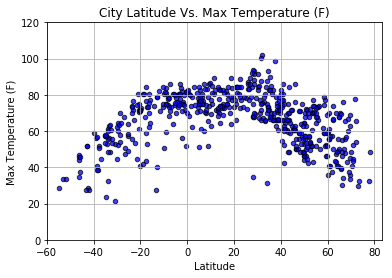

In [140]:
# Plot the city latitude vs. maximum temperature
ax = df.plot.scatter(x="Lat", y="Max_Temp", fontsize=10, color = 'blue', edgecolor = 'black', alpha=0.75)
ax.set_xlabel("Latitude")
ax.set_ylabel("Max Temperature (F)")
ax.set_title("City Latitude Vs. Max Temperature (F)")
ax.set_xlim(min(df["Lat"])-5, max(df["Lat"])+5)
ax.set_ylim(0, 120)
plt.grid()
plt.savefig("figures/city lat vs max temp")
plt.show()

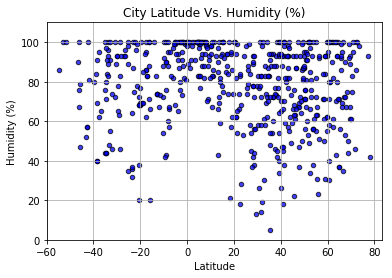

In [134]:
# Plot the city latitude vs. humidity
ax = df.plot.scatter(x="Lat", y="Humidity", fontsize=10, color = 'blue', edgecolor = 'black', alpha=0.75)
ax.set_xlabel("Latitude")
ax.set_ylabel("Humidity (%)")
ax.set_title("City Latitude Vs. Humidity (%)")
ax.set_xlim(min(df["Lat"])-5, max(df["Lat"])+5)
ax.set_ylim(0, 110)
plt.grid()
plt.savefig("figures/city lat vs Humidity")
plt.show()

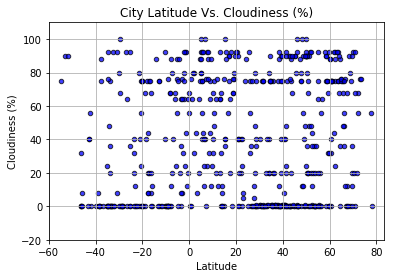

In [135]:
# Plot the city latitude vs. cloudness
ax = df.plot.scatter(x="Lat", y="Cloudiness", fontsize=10, color = 'blue', edgecolor = 'black', alpha=0.75)
ax.set_xlabel("Latitude")
ax.set_ylabel("Cloudiness (%)")
ax.set_title("City Latitude Vs. Cloudiness (%)")
ax.set_xlim(min(df["Lat"])-5, max(df["Lat"])+5)
ax.set_ylim(-20, 110)
plt.grid()
plt.savefig("figures/city lat vs cloudiness")
plt.show()

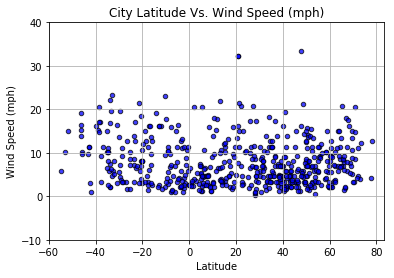

In [136]:
# Plot the city latitude vs. wind speed
ax = df.plot.scatter(x="Lat", y="Wind_Speed", fontsize=10, color = 'blue', edgecolor = 'black', alpha=0.75)
ax.set_xlabel("Latitude")
ax.set_ylabel("Wind Speed (mph)")
ax.set_title("City Latitude Vs. Wind Speed (mph)")
ax.set_xlim(min(df["Lat"])-5, max(df["Lat"])+5)
ax.set_ylim(-10, 40)
plt.grid()
plt.savefig("figures/city lat vs wind speed")
plt.show()

Text(0.5,0,'Longtitude')

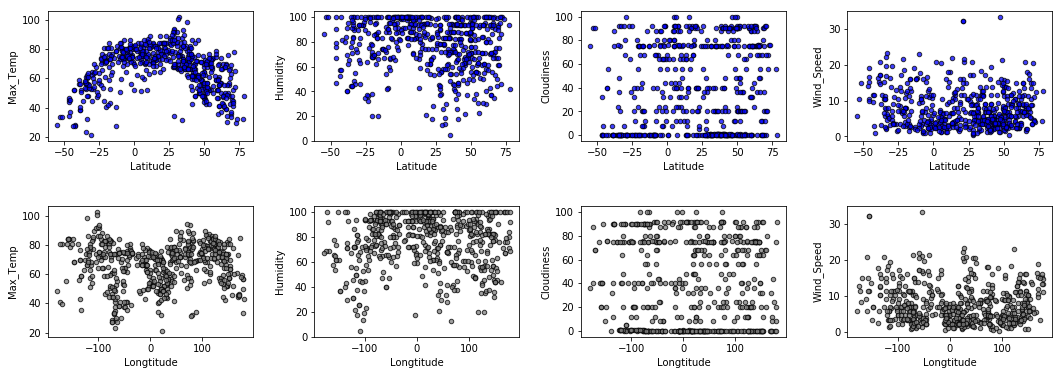

In [157]:
# Use subplots to show the relationships between geo-coordinates and weather parameters
fig, axx = plt.subplots(2,4, figsize=(18,6))
plt.subplots_adjust(wspace=0.3, hspace=0.5)
ax11 = df.plot.scatter(x="Lat", y="Max_Temp", fontsize=10, color = 'blue', edgecolor = 'black', alpha=0.75, ax=axx[0][0])
ax11.set_xlabel("Latitude")
ax12 = df.plot.scatter(x="Lat", y="Humidity", fontsize=10, color = 'blue', edgecolor = 'black', alpha=0.75, ax=axx[0][1])
ax12.set_xlabel("Latitude")
ax13 = df.plot.scatter(x="Lat", y="Cloudiness", fontsize=10, color = 'blue', edgecolor = 'black', alpha=0.75, ax=axx[0][2])
ax13.set_xlabel("Latitude")
ax14 = df.plot.scatter(x="Lat", y="Wind_Speed", fontsize=10, color = 'blue', edgecolor = 'black', alpha=0.75, ax=axx[0][3])
ax14.set_xlabel("Latitude")

ax11 = df.plot.scatter(x="Lng", y="Max_Temp", fontsize=10, color = 'grey', edgecolor = 'black', alpha=0.75, ax=axx[1][0])
ax11.set_xlabel("Longtitude")
ax12 = df.plot.scatter(x="Lng", y="Humidity", fontsize=10, color = 'grey', edgecolor = 'black', alpha=0.75, ax=axx[1][1])
ax12.set_xlabel("Longtitude")
ax13 = df.plot.scatter(x="Lng", y="Cloudiness", fontsize=10, color = 'grey', edgecolor = 'black', alpha=0.75, ax=axx[1][2])
ax13.set_xlabel("Longtitude")
ax14 = df.plot.scatter(x="Lng", y="Wind_Speed", fontsize=10, color = 'grey', edgecolor = 'black', alpha=0.75, ax=axx[1][3])
ax14.set_xlabel("Longtitude")